# Testing the differential of the Lyapunov function
This script serves to check the correctness of the differential of the solution $Y$ to the Lyapunov equation:
$$
XY + YX^T + C = 0
$$
with respect to the matrix $X$. 

The script measures the angle between the predicted direction from the differential expression and the true direction from computing the two solutions

The script measures the effect of different initialisation schemes including normal distribution initialisation and stability optimized

In [1]:
import numpy as np
from scipy.linalg import solve_continuous_lyapunov
import matplotlib.pyplot as plt
from ssa import optimize_ssa
from tqdm import tqdm

In [ ]:
def directional_derivative(X: np.array, Y: np.array, V: np.array):    
    C = V @ Y + Y @ V.T
    return solve_continuous_lyapunov(X, -C)

In [3]:
def initialise(scheme: str, n: int):

    if scheme == "normal":
        return np.random.normal(0.0, 1.0, size=(n, n))    
    else:
        A = np.random.normal(0.0, 1.0, size=(n, n))
        A = optimize_ssa(A, eps=0.01, target=-0.1, step_size=1.0, iters=60)[0]
        return A
    

In [4]:
N = 64
iters = 100
step_size = 1.0
init_scheme = "stable" # or stable

In [5]:
thetas = []
eigs_r_max = []

In [6]:
for iter_idx in tqdm(range(iters)):
    # choose random matrix C
    # C = np.random.normal(0.0, 1.0, size=(N, N))
    C = np.identity(N)

    # choose random matrix X_0
    X_0 = initialise(init_scheme, N)

    # check that the matrix X_0 is invertible
    if (np.min(np.absolute(np.linalg.eigvals(X_0)))) < 0.1:
        print("not good invertibility")
        iter_idx -= 1
        continue

    # if stable, check if what the maximum eigenvalue was
    if init_scheme == "stable":
        eigs_r_max.append(np.max(np.real(np.linalg.eigvals(X_0))))

    # make perturbation X_1 = X_0 + V 
    # for some random V
    # and check that the new $X_1$ is invertible
    V = np.random.normal(0.0, step_size, size=(N, N))
    V = V / np.linalg.norm(np.ravel(V))
    V *= step_size

    X_1 = X_0 + V
    if (np.min(np.absolute(np.linalg.eigvals(X_1)))) < 0.05:
        print("not good invertibility")
        iter_idx -= 1
        continue

    # find solution Y_0
    Y_0 = solve_continuous_lyapunov(X_0, -C)

    # find solution Y_1
    Y_1 = solve_continuous_lyapunov(X_1, -C)

    D = Y_1 - Y_0

    # find the directional derivative
    dydx = directional_derivative(X_0, Y_0, V)

    # see if Y_1 - Y_0 is in the same direction as the directional derivative
    vec_D = np.ravel(D)
    vec_dydx = np.ravel(dydx)

    theta = np.arccos(np.dot(vec_D, vec_dydx) / (np.linalg.norm(vec_D) * np.linalg.norm(vec_dydx)))

    theta = theta * 180 / np.pi

    thetas.append(theta)

  0%|          | 0/100 [00:00<?, ?it/s]

 10%|█         | 10/100 [00:09<01:26,  1.04it/s]

DID NOT CONVERGE


 26%|██▌       | 26/100 [00:25<01:12,  1.02it/s]

DID NOT CONVERGE


100%|██████████| 100/100 [01:36<00:00,  1.03it/s]


(array([1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 1., 2., 1., 3., 0., 2., 0., 0., 2., 1., 1., 2., 1.,
        1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 0., 0., 2., 1., 1., 3.,
        1., 1., 1., 1., 3., 1., 2., 2., 0., 2., 0., 0., 2., 2., 2., 1., 2.,
        1., 1., 1., 1., 0., 1., 2., 0., 2., 2., 0., 0., 1., 1., 1., 1., 2.,
        1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1.64232764,  1.69606851,  1.74980937,  1.80355024,  1.8572911 ,
         1.91103197,  1.96477

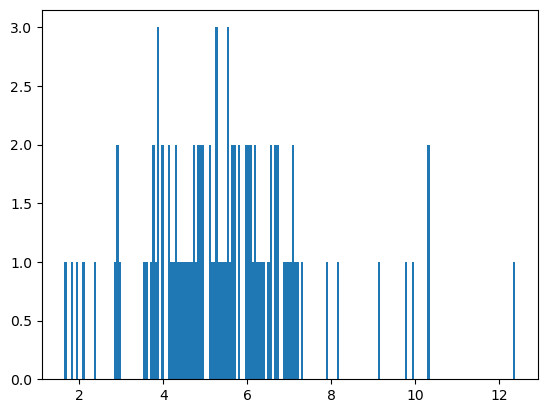

In [7]:
plt.hist(thetas, bins=200)

In [8]:
eigs_r_max

[-0.5633101568994758,
 -0.38542360927886343,
 -0.3673296843214825,
 -0.30210773053309026,
 -0.39364728387131265,
 -0.385594423300028,
 -0.14714979308085616,
 -0.4106379937889907,
 -0.27769514855297633,
 -0.2865770567826889,
 -0.16090341844469827,
 -0.1576842437766947,
 -0.4322157587737257,
 -0.164507234422415,
 -0.2893232719686999,
 -0.19351521056167575,
 -0.22218249581419652,
 -0.648024468923428,
 -0.4255298584815391,
 -0.5290771082498015,
 -0.2493121702761501,
 -0.5214939481936793,
 -0.3504929334307265,
 -0.591033971009759,
 -0.20998707116756274,
 -0.23183196110697976,
 -0.1313441479299195,
 -0.26229866304362603,
 -0.5787004586342166,
 -0.24560073087983744,
 -0.29767718500241,
 -0.24228392539232732,
 -0.5906450382743745,
 -0.4740451034700731,
 -0.18830901829098656,
 -0.3604956884956554,
 -0.3604147765819141,
 -0.45111340651035975,
 -0.25057513254077013,
 -0.22257006933464174,
 -0.5016816082313711,
 -0.32646752102283316,
 -0.3830580473358196,
 -0.20591079321191758,
 -0.333371437274491